In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Filippo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_json("clustered.json")


In [ ]:
#vader thresholds in literature
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
text = data["text"].tolist()
scores = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
scores

E:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[0.7519,
 0.8384,
 0.923,
 -0.8478,
 0.7351,
 0.6325,
 0.8442,
 0.5673,
 0.7469,
 0.69,
 0.0,
 0.7759,
 0.0,
 0.8777,
 0.7592,
 0.0,
 -0.7424,
 0.6996,
 -0.1386,
 -0.5596,
 -0.1759,
 0.75,
 0.69,
 0.6696,
 0.6239,
 0.8777,
 -0.6249,
 0.4738,
 0.4926,
 0.4559,
 0.6249,
 -0.3818,
 -0.4389,
 -0.4936,
 0.6988,
 -0.5754,
 0.1396,
 -0.8625,
 0.8519,
 -0.521,
 0.0,
 -0.6249,
 -0.5267,
 0.9184,
 0.5719,
 0.5562,
 0.0,
 0.8728,
 -0.3453,
 0.0,
 0.7707,
 0.8977,
 0.4648,
 0.7034,
 0.0,
 0.3802,
 0.9379,
 0.7405,
 0.7603,
 0.2964,
 0.5053,
 0.6988,
 0.8622,
 -0.4717,
 0.7519,
 -0.4717,
 -0.2023,
 -0.0688,
 0.7574,
 -0.2481,
 0.9015,
 0.0,
 -0.7906,
 -0.807,
 0.8559,
 -0.784,
 0.8017,
 0.4374,
 0.5423,
 0.4648,
 -0.8516,
 -0.4389,
 0.7955,
 0.9547,
 -0.7997,
 -0.4981,
 0.68,
 -0.4287,
 -0.3595,
 0.5255,
 -0.4767,
 -0.3989,
 0.0,
 0.0,
 0.7345,
 0.836,
 0.7783,
 0.0,
 0.0992,
 0.75,
 -0.2401,
 -0.3412,
 0.0,
 0.7772,
 0.6239,
 0.0,
 0.5461,
 0.6114,
 0.6988,
 0.5983,
 0.8505,
 -0.4767,
 0.6486,
 0.

In [4]:
data["vaderScore"] = scores

In [5]:
data.drop(["in_reply_to_user_id_str","is_retweet","text","modded_text","modded1","year","date"],axis=1,inplace=True)
data

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels,vaderScore
25967,6735,2108,1,0,53,i will be on foxnews live with members of my f...,foxnew live member famili 1150 pm ring ...,3,0.7519
25968,8581,3460,1,3,53,happy new year amp thank you,happi new year amp thank,0,0.8384
25970,8258,1948,1,6,53,happy new year from thank you to my great fa...,happi new year thank great famili support,0,0.9230
25971,7490,2721,1,6,53,jallenaip hillary said she was in a fog of war...,jallenaip hillari said fog war explan l...,2,-0.8478
25972,3330,933,1,21,53,sprinklermanus cnn realdonaldtrump theyre spen...,sprinklermanu cnn realdonaldtrump theyr s...,2,0.7351
25973,8495,2642,1,23,53,well the year has officially begun i have many...,well year offici begun mani stop plan ...,3,0.6325
25974,2780,654,1,23,53,marie7777777777 realdonaldtrump we love u to t...,marie7777777777 realdonaldtrump love u tr...,0,0.8442
25975,3066,893,1,23,53,jodil792 we are standing with you spreading th...,jodil792 stand spread wordtrump presid 2...,0,0.5673
25976,3492,881,1,23,53,memeoryhead im one of your biggest fans mr tru...,memeoryhead im one biggest fan mr trump...,0,0.7469
25977,3346,922,1,23,53,casuperrunner huckabee is a good manbut he n...,casuperrunn huckabe good manbut need get...,2,0.6900


In [6]:
data.corr()

,favorite_count,retweet_count,month,hour,week_year,labels,vaderScore
favorite_count,1.000000,0.908397,0.464811,0.003317,0.443658,0.060065,-0.023446
retweet_count,0.908397,1.000000,0.421107,0.015665,0.400986,0.027518,-0.061607
month,0.464811,0.421107,1.000000,-0.049998,0.936428,-0.005117,-0.018083
hour,0.003317,0.015665,-0.049998,1.000000,-0.043332,-0.003687,-0.047063
week_year,0.443658,0.400986,0.936428,-0.043332,1.000000,-0.009679,-0.017179
labels,0.060065,0.027518,-0.005117,-0.003687,-0.009679,1.000000,-0.113077
vaderScore,-0.023446,-0.061607,-0.018083,-0.047063,-0.017179,-0.113077,1.000000


In [7]:
x1 = data[data["labels"] == 1]
print(len(x1))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(),
                      columns=feat_names)
    return(df)
  
corpus = x1["modded1_stemmed"].tolist()

# instantiate the vectorizer object
cvec = TfidfVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpus)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
c = wm2df(wm, tokens)

1078


In [8]:
x1.reset_index(inplace=True,drop=True)
res = pd.concat([x1,c], axis=1)
res1 = res.drop(["noTags_punct","modded1_stemmed","labels","favorite_count","retweet_count"],axis=1)
res

,favorite_count,retweet_count,month,hour,week_year,noTags_punct,modded1_stemmed,labels,vaderScore,08,...,youngstown,your,youth,yr,yup,zero,zilch,zogbi,zucker,zuckerman
0,10339,3759,1,23,53,the person that hillary clinton least wants to...,person hillari clinton least want run f...,1,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5802,2124,1,12,53,jebbush is a sad case a total embarrassment to...,jebbush sad case total embarrass famili ...,1,-0.7424,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5458,1749,1,12,53,jebbush is a low energy stiff who should focus...,jebbush low energi stiff focu special i...,1,0.6996,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6688,2682,1,14,53,alshabbab not isis just made a video on me th...,alshabbab isi made video frontrunn amp ...,1,-0.4389,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6775,2560,1,17,53,does anybody remember when bill clinton in 200...,anybodi rememb bill clinton 2008 work l...,1,-0.5754,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3861,1343,1,18,53,chucktodd said today on meetthepress that atta...,chucktodd said today meetthepress attack ...,1,0.1396,0.353221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3733,984,1,19,53,ruthmarcus of the washingtonpost was terrible ...,ruthmarcu washingtonpost terribl today fa...,1,-0.8625,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2732,772,1,19,53,barbaraslavin1 washingtonpost bashing distin...,barbaraslavin1 washingtonpost bash disting...,1,-0.5210,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5338,2525,1,20,53,iran with all of the money and all else given ...,iran money els given obama want way ta...,1,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9300,3403,1,23,53,the worst thing hillary could do is have her h...,worst thing hillari could husband campai...,1,-0.6249,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KMEANS

In [ ]:
sse_list = list()
max_k = 30
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(res1)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(res1)
print(model.inertia_)
print
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster 0: ")
labels = model.labels_
res1["labels"] = labels
d = silhouette_score(res1, labels,metric='euclidean')
print(d)

In [ ]:
plt.hist(res1["vaderScore"])

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()
    


In [ ]:
res[res1["labels"] == 1]["noTags_punct"].tolist()

# hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering
sil = []
for c in range(2,20):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=c)
    clustering.fit(res1)
    labels = clustering.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

In [ ]:
plt.plot([x for x in range(len(sil))],sil)

In [ ]:
clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=8)
clustering.fit(res1)
labels = clustering.labels_
res1["labels"] = labels

In [ ]:

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()
    

In [ ]:
res[res1["labels"] == 2]["noTags_punct"].tolist()

# BIRCH

In [19]:
from sklearn.cluster import Birch

sil=[]
for c in range(2,10):
    brc = Birch(branching_factor=20, n_clusters=c, threshold=0.3,compute_labels=True)
    brc.fit(res1)
    labels = brc.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

2 0.6185042629729616
3 0.32860714333547164
4 0.2980695967365603
5 0.38407608287098777
6 0.3368492235083523
7 0.22078334269360422
8 0.14241530169632124
9 0.1766686161880004


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


203


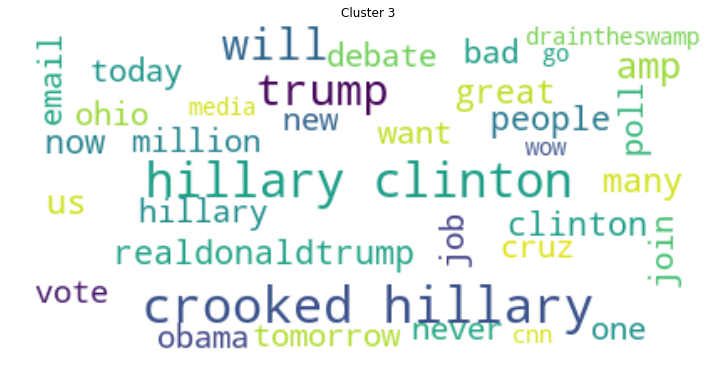

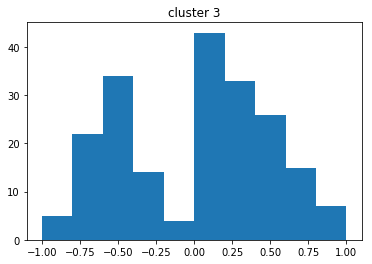

95


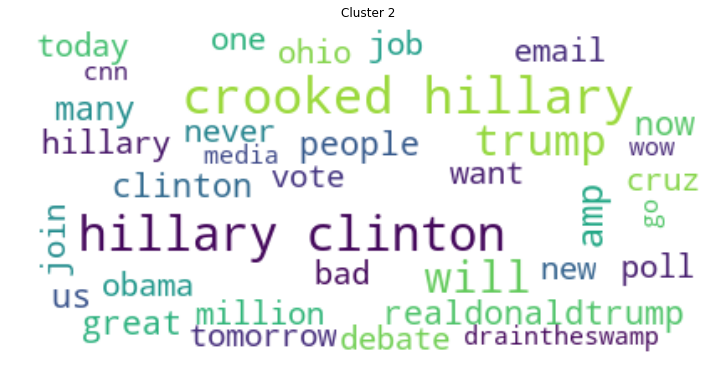

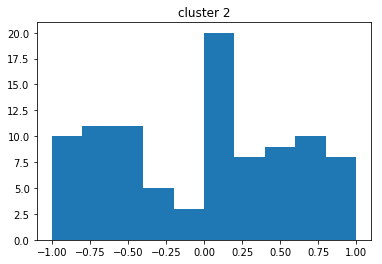

216


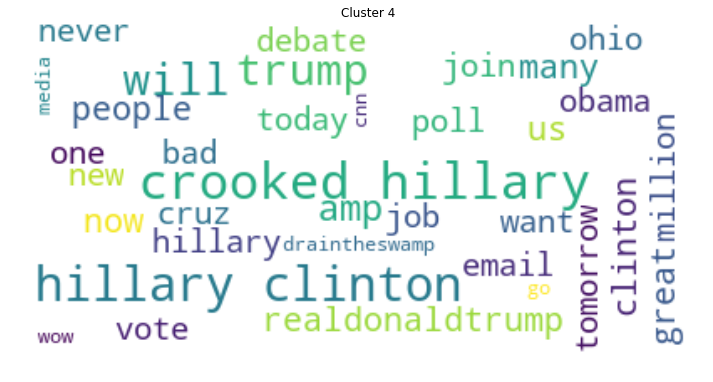

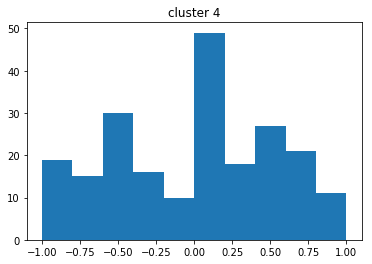

389


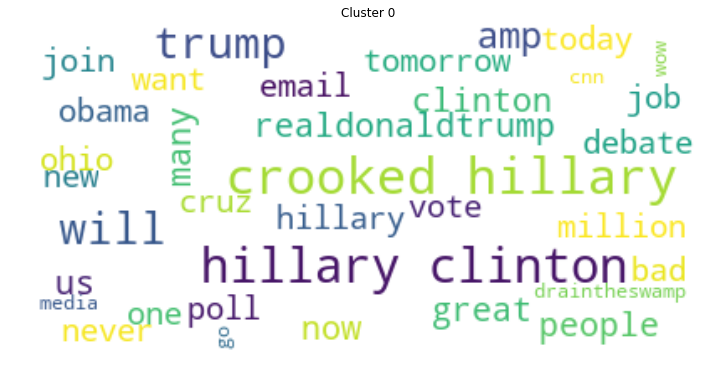

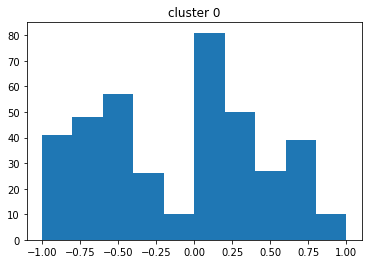

175


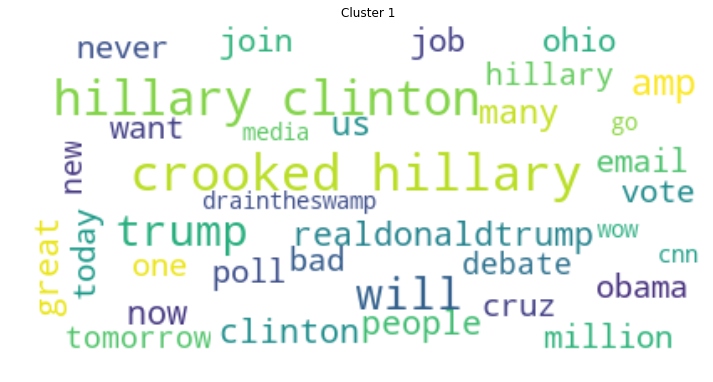

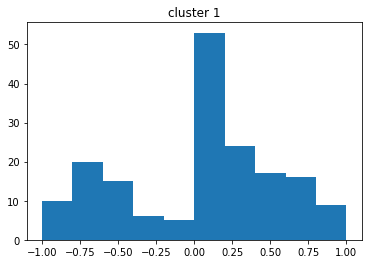

In [18]:
brc = Birch(branching_factor=20, n_clusters=5, threshold=0.3,compute_labels=True)
brc.fit(res1)
labels = brc.labels_
res1["labels"] = labels

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()